<a href="https://colab.research.google.com/github/adrianatrevinoe/ArtificialInteligenceWorks/blob/main/PandasTips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Mistakes

1. Writing to a csv with unnecesary index

In [1]:
# Imports standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load data from file
df = pd.read_csv(filepath_or_buffer="datasets/weight-height.csv", sep=',', skiprows=0)


*   When writing with csv with unnecesary non valuable index:


```
      Index = False

      or 

      index_col = [0]
```


*   No spaces in columns names

In [3]:
df.to_csv('output.csv',index=False)
df = pd.read_csv('output.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


##### Remove unnecesary columns

In [15]:
df_customer = pd.read_csv("datasets/Train.csv")
df_customer.sample(5,random_state=44)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1627,466681,Male,No,19,No,Healthcare,2.0,Low,4.0,Cat_6,D
805,462758,Male,No,18,No,Healthcare,0.0,Low,3.0,Cat_6,D
3725,467212,Female,No,28,Yes,Doctor,1.0,Low,3.0,Cat_6,B
6581,460636,Male,Yes,45,Yes,Artist,2.0,Average,3.0,Cat_3,D
7462,459157,Male,No,37,Yes,Engineer,1.0,Low,1.0,Cat_6,D


In [16]:
df_customer = df_customer.drop(["Segmentation", "ID"], axis="columns")
df_customer.head(4)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6


Know number of rows in all the dataset and in each col

In [17]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


According to the RageIndex part, our dataframe (df) holds 8,068 rows. By looking at the number of data points in each column, we can establish that we have many missing data points (e.g. Graduated has 7,990 rows instead of 8,068).

For the sake of simplicity, we remove all rows with any missing values with df.dropna():

In [18]:
df_customer = df_customer.dropna()
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 520.7+ KB


df.info() now shows that all columns have 6,665 rows, but our index still goes from 0 to 8067, so we reset it with df.reset_index(), then remove the freshly created index column with df.drop("index", axis="columns"):

In [19]:
df_customer = df_customer.reset_index()
df_customer = df_customer.drop("index", axis="columns")
df_customer.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


## Queries
Instead of 


```
df.loc[(df['Year'] < 2010) & (df['Time'] > 10)]
```
Use: 

```
df.query('Year < 1980 and Time >10')
```





In [5]:
df.query('Height < 70 and Weight > 200')

,Gender,Height,Weight
4,Male,69.881796,206.349801
33,Male,69.180161,205.183621
34,Male,69.577202,204.164125
86,Male,66.596197,208.345694
111,Male,68.190684,201.487962
...,...,...,...
4661,Male,69.153102,201.994030
4744,Male,69.859331,202.805975
4754,Male,69.469447,202.649823
4840,Male,69.599795,208.948775


**Don't use string methods to formulate queries**


'Year < ' + str{min_height} + .......'

In [6]:
min_height = 70
min_weight = 200
df= df.query('Height < @min_height and Weight > @min_weight')
df.head(3)

,Gender,Height,Weight
4,Male,69.881796,206.349801
33,Male,69.180161,205.183621
34,Male,69.577202,204.164125


**Don't use inplace = True**
It overwrites dataframe with changes


```
df.fillna(0, inplace = True)
df.reset_index(inplace = True)
```



overwrite with the modifications

In [7]:
df = df.fillna(0)
df = df.reset_index()

**Don't iter through cols**

To determine rows with height greater than 65


```
for i, row in df.iterrows():
  if row [ 'Height'] > 65:
    df.loc[i, 'is_recent'] = True
  else:
    df.loc[i, 'is_recent'] = False
```



In [8]:
df['greater_than_70'] = df['Height'] > 70
df

,index,Gender,Height,Weight,greater_than_70
0,4,Male,69.881796,206.349801,False
1,33,Male,69.180161,205.183621,False
2,34,Male,69.577202,204.164125,False
3,86,Male,66.596197,208.345694,False
4,111,Male,68.190684,201.487962,False
...,...,...,...,...,...
168,4661,Male,69.153102,201.994030,False
169,4744,Male,69.859331,202.805975,False
170,4754,Male,69.469447,202.649823,False
171,4840,Male,69.599795,208.948775,False


In [9]:
df['height_square'] = df.apply(lambda row: row['Height']**2, axis = 1)
df.head(3)

,index,Gender,Height,Weight,greater_than_70,height_square
0,4,Male,69.881796,206.349801,False,4883.465393
1,33,Male,69.180161,205.183621,False,4785.894690
2,34,Male,69.577202,204.164125,False,4840.987089


**It's best to create a .copy of the dataframe to edit the dataframe**

In [10]:
df_tall= df.query('Height > 70').copy()
# df_tall['super_tall'] = df_tall['Height']
df_tall.head(3)

,index,Gender,Height,Weight,greater_than_70,height_square


Apply changes not all at once


```
df2 = df.query('Year > 1975')
df3= df2.groupby(['Athlete'] ) [['Time']].min()
df_out = df3.sort_values('Time')
df out
```

In [11]:
df_out = (df.query('Height > 50')
  # .groupby(['Weight'])[['Gender']].min()
  .sort_values('Height')
)
df_out

,index,Gender,Height,Weight,greater_than_70,height_square
124,3524,Male,66.145868,202.130274,False,4375.275836
3,86,Male,66.596197,208.345694,False,4435.053393
99,2815,Male,67.075852,203.493687,False,4499.169911
7,163,Male,67.233931,203.350339,False,4520.401467
40,953,Male,67.283507,203.135760,False,4527.070371
...,...,...,...,...,...,...
23,485,Male,69.974301,212.804259,False,4896.402783
66,1622,Male,69.983137,206.414412,False,4897.639529
57,1446,Male,69.989953,208.107783,False,4898.593522
148,4137,Male,69.990098,206.660949,False,4898.613872


In [12]:
df_bool = df.copy()
df_bool['sub70'] = df_bool['Height'] < 70
df_bool.head(5)

,index,Gender,Height,Weight,greater_than_70,height_square,sub70
0,4,Male,69.881796,206.349801,False,4883.465393,True
1,33,Male,69.180161,205.183621,False,4785.894690,True
2,34,Male,69.577202,204.164125,False,4840.987089,True
3,86,Male,66.596197,208.345694,False,4435.053393,True
4,111,Male,68.190684,201.487962,False,4649.969385,True


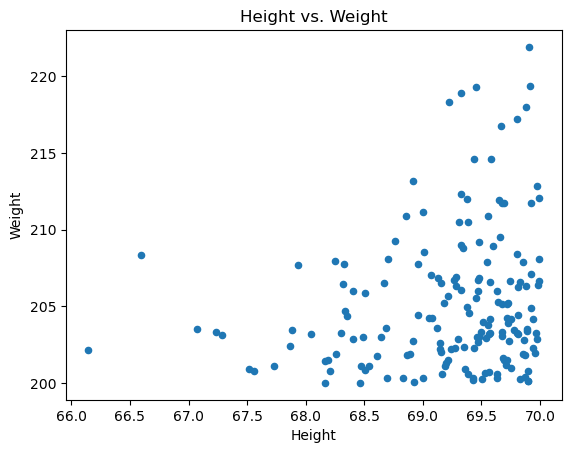

In [13]:
ax = df.plot(kind = 'scatter',
             x = 'Height',
             y = 'Weight',
             title = 'Height vs. Weight'
             )

**Don't use string methods manually**

In [14]:
df['Gender_Upper'] = df['Gender'].str.upper()
df.head

<bound method NDFrame.head of      index Gender     Height      Weight  greater_than_70  height_square  \
0        4   Male  69.881796  206.349801            False    4883.465393   
1       33   Male  69.180161  205.183621            False    4785.894690   
2       34   Male  69.577202  204.164125            False    4840.987089   
3       86   Male  66.596197  208.345694            False    4435.053393   
4      111   Male  68.190684  201.487962            False    4649.969385   
..     ...    ...        ...         ...              ...            ...   
168   4661   Male  69.153102  201.994030            False    4782.151557   
169   4744   Male  69.859331  202.805975            False    4880.326189   
170   4754   Male  69.469447  202.649823            False    4826.004041   
171   4840   Male  69.599795  208.948775            False    4844.131457   
172   4870   Male  69.969886  203.275695            False    4895.784924   

    Gender_Upper  
0           MALE  
1           MALE  



**Don't repeat code**
```
# Transform mens
dfw = pd. read_csv('womens 100m.csv')
dfw['Time_Norm'] = dfw['Time'] / dfw['Time'].mean()
d'fw['Place'] = dfw['Place'].str.lower()
dfw.head()

# Transform womens
|dfm = pd. read_csv ('mens 100m.csv')
dfm ['Time_Norm'] = dfm['Time'] / dfm ['Time'].mean()
dfm['Place'] = dfm['Place'].str.lower()
dfm.head()
```



```
def process data(df):
  df['Time_Norm'] = df['Time'] / df['Time'].mean()
  df [ 'Place'] = df['Place'].str.lower()
  return df

dfw = pd. read csv ('womens 100m.csv')
dfm = pd. read_csv ('mens 100m.csv')

dfm = process_data(dfm)
dfw = process_data(dfw)| I
dfw
```





**Rename Columns**


```
df = pd. read_csv('mens 100m.csv')
print('Old Columns:', df.columns.tolist())
df.columns = ['Race_Year', 'Time', 'Athlete', 'Place', 'Name']|
print('New Columns:', df.columns.tolist())
df.head()
```

---> good way
```
df = pd.read_csv('mens 100m.csv')
df = df. rename (columns={'Year': 'Race_Year'})
df.head()

```



In [15]:
df_bool = df_bool.rename(columns={'Gender': 'Genders New'})
df_bool.head(2)

,index,Genders New,Height,Weight,greater_than_70,height_square,sub70
0,4,Male,69.881796,206.349801,False,4883.465393,True
1,33,Male,69.180161,205.183621,False,4785.894690,True


**Aggregating(group) by groups**

Return lowest men and women time value

```
mens_record = df.loc[df['Grouping'] == 'Mens']['Time'].min()
womens_record = df.loc[df['Grouping'] == 'Womens']['Time'].min()
print (mens_record, womens_record)
```
--->

```
df.groupby('Grouping')['Time'].min()
```





In [16]:
df.groupby('Gender')['Height'].min()

Gender
Male    66.145868
Name: Height, dtype: float64

In [17]:
df.groupby('Gender')['Height'].mean()

Gender
Male    69.21371
Name: Height, dtype: float64

**Looping over rows in df to create groupings**

here we iterate over each row in df, storing the results after each iter

```
mens_times = []
womens_times = []
# Get mens and womens average
for i, row in df.iterrows():
  group = row.Grouping
  if group == "Mens":
    mens_times.append(row. Time)
  else:
    womens_times.append(row. Time)

avg_mens = np.mean(mens_times)
avg_womens np.mean(womens_times)
mens_count = len (mens_times)
womens_count = len (womens_times)
print (avg_mens, avg_womens, mens_count, womens_count)
```
-->

```
df.groupby('Grouping') [ 'Time'].agg ( ['mean', 'count'])
```

In [18]:
df.groupby('Gender')['Height'].agg(['mean','count', 'std'])

,mean,count,std
Gender,,,
Male,69.21371,173,0.704999


**Calculate change in series**

*   diff()
*   pct_change()

```
import pandas as pd
df = pd. read_csv ('womens 100m.csv')
df['perc_change'] = df['Time'].pct_change()
df['change'] = df['Time'}.diff()
df.head()
```



## Styling



In [19]:
df.sort_values('Height').head (10) [ [ 'Gender', 'Height']] \
  .reset_index(drop=True) \
  .style \
  .background_gradient (cmap="Reds")

,Gender,Height
0,Male,66.145868
1,Male,66.596197
2,Male,67.075852
3,Male,67.233931
4,Male,67.283507
5,Male,67.519372
6,Male,67.556183
7,Male,67.725619
8,Male,67.864747
9,Male,67.881889


In [20]:
df2 = pd.DataFrame (np. random. randn (10,4), columns=['A', 'B', 'C','D'])
df2.style.format('{:.3f}', na_rep="")\
  .bar(align=0, vmin=-2.5, vmax=2.5, cmap="bwr", height=50, width=60, props="width: 120px; border-right: 1px solid black;")\
  .text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)

,A,B,C,D
0,0.741,-0.490,-1.000,-0.870
1,-1.043,2.464,-0.945,0.203
2,-0.854,0.612,-0.323,0.231
3,0.169,-0.281,-0.613,-0.237
4,0.899,0.864,-0.099,2.441
5,-1.105,-0.388,-0.030,-1.560
6,-0.340,-1.528,1.291,1.236
7,-0.087,-0.433,0.423,0.091
8,-1.667,-0.708,-2.067,1.072
9,-0.387,-0.332,-0.005,1.636


**categorical data types**

Take less space in memory and can make faster operations in large datasets 

It's better to store men and women as **categorical data** instead of as a string object as below.

In [21]:
df['Gender']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
168    Male
169    Male
170    Male
171    Male
172    Male
Name: Gender, Length: 173, dtype: object

In [22]:
df['Gender'] = df['Gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index            173 non-null    int64   
 1   Gender           173 non-null    category
 2   Height           173 non-null    float64 
 3   Weight           173 non-null    float64 
 4   greater_than_70  173 non-null    bool    
 5   height_square    173 non-null    float64 
 6   Gender_Upper     173 non-null    object  
dtypes: bool(1), category(1), float64(3), int64(1), object(1)
memory usage: 7.3+ KB


**Check for duplicated columns and remove them**

In [23]:
df_double = pd.concat([df, df], axis=1)
df_double = df_double.loc[:,~df_double.columns.duplicated()]. copy()
df_double ['Height']

0      69.881796
1      69.180161
2      69.577202
3      66.596197
4      68.190684
         ...    
168    69.153102
169    69.859331
170    69.469447
171    69.599795
172    69.969886
Name: Height, Length: 173, dtype: float64

## Fitter

In [24]:
pip install fitter

Note: you may need to restart the kernel to use updated packages.


In [25]:

from fitter import Fitter, get_common_distributions, get_distributions

In [26]:
df = pd.read_csv(filepath_or_buffer="datasets/weight-height.csv", sep=',', skiprows=0)

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 12.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003108,848.384299,-149805.573382,inf,0.013858,4.254279e-02
lognorm,0.005284,803.863780,-144506.315623,inf,0.022787,6.081080e-05
gamma,0.005296,803.860095,-144484.269318,inf,0.023553,2.987814e-05
cauchy,0.035164,773.299862,-125562.369408,inf,0.086815,5.045983e-66
rayleigh,0.063472,inf,-119656.488043,inf,0.171452,1.715558e-257


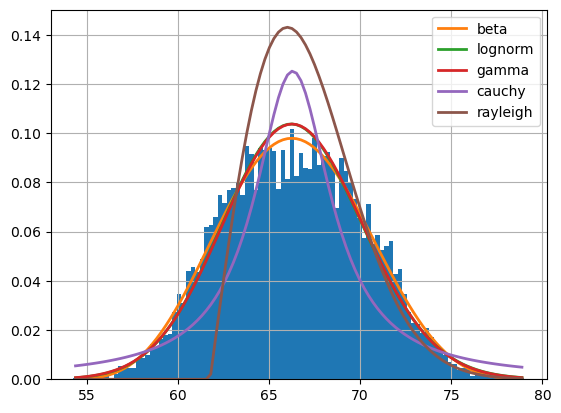

In [27]:
height = df["Height"].values
dist_fitter = Fitter(height,
                   distributions = ["cauchy",
                                    "rayleigh",
                                    "beta",
                                    "gamma",
                                    "lognorm"])       
dist_fitter.fit()
dist_fitter.summary()    

We can see that the beta distribution is the best fit based on the sumsquare_error criteria

In [28]:
dist_fitter.get_best(method = 'sumsquare_error')

{'beta': {'a': 5.958319408062067,
  'b': 6.498169312519742,
  'loc': 52.87268950557022,
  'scale': 28.213574971918785}}

beta **parameters**

In [29]:
dist_fitter.fitted_param["beta"]

(5.958319408062067, 6.498169312519742, 52.87268950557022, 28.213574971918785)

In [30]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [31]:

df2 = pd.read_csv(filepath_or_buffer="datasets/weight-height.csv", sep=',', skiprows=0)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 13.33it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.005284,803.863780,-144506.315623,inf,0.022787,6.081080e-05
gamma,0.005296,803.860095,-144484.269318,inf,0.023553,2.987814e-05
chi2,0.005353,807.328297,-144376.113988,inf,0.026335,1.856371e-06
norm,0.005383,802.162043,-144330.934485,inf,0.025554,4.177451e-06
cauchy,0.035164,773.299862,-125562.369408,inf,0.086815,5.045983e-66


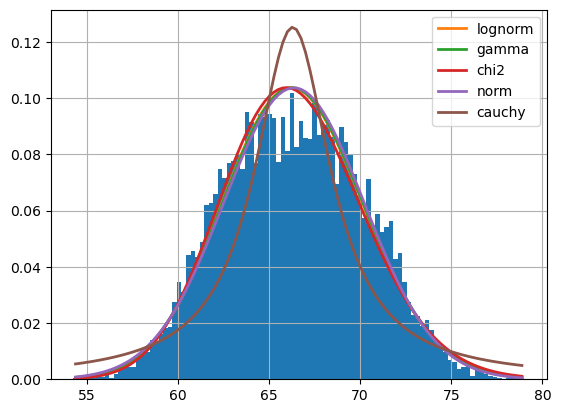

In [32]:
height = df2["Height"].values
dist_fitter = Fitter(height,
                   distributions = get_common_distributions())       
dist_fitter.fit()
dist_fitter.summary()    

In [33]:
dist_fitter.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.025604849307773056,
  'loc': -83.8820510796117,
  'scale': 150.20104876196217}}

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 16.72it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.005625,830.466237,-68472.040852,inf,0.010739,6.074763e-01
lognorm,0.005783,835.665080,-68324.453510,inf,0.012065,4.570223e-01
gamma,0.005800,834.544080,-68310.306242,inf,0.012444,4.177079e-01
chi2,0.007539,851.923189,-66999.009582,inf,0.024737,4.326303e-03
cauchy,0.041595,755.760812,-58467.834134,inf,0.073864,3.608407e-24


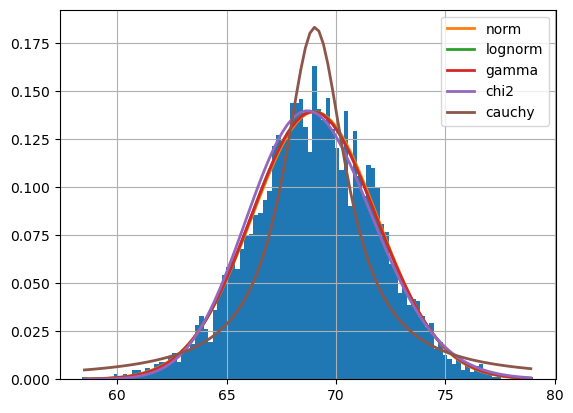

In [34]:
gender = df.groupby('Gender')
men_height = gender.get_group('Male')['Height']
dist_fitter = Fitter(men_height,
                   distributions = get_common_distributions())       
dist_fitter.fit()
dist_fitter.summary() 


In [35]:
gender = df.groupby('Gender')
print(gender)

In [46]:

df = pd.read_csv(filepath_or_buffer="datasets/weight-height.csv", sep=',', skiprows=0)
gender = df.groupby('Gender')

# Create subplots for each gender
for gender_name, group in gender:
    height = group['Height']
    # print(height)
    dist_fitter = Fitter(height, distributions=get_common_distributions())       
    dist_fitter.fit()
    # dist_fitter.summary()
    best=dist_fitter.get_best(method = 'sumsquare_error')
    print(best)

    # plt.title(f"Gender: {gender_name}")
    # plt.xlabel("Height")
    # plt.ylabel("Density")
    # plt.show()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 19.63it/s]


{'gamma': {'a': 12899.326046528327, 'loc': -242.5469882636324, 'scale': 0.023741959815273564}}


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 19.16it/s]

{'norm': {'loc': 69.02634590621741, 'scale': 2.863075878119538}}
